# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient

# Data Generation

In [2]:
#Create empty graph
G = nx.Graph()

In [3]:
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

G.add_edges_from([
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,0),

    (0,2),
    (0,3),
    (0,4),
    (1,3)
])

In [4]:
G = nx.Graph()

In [5]:
G = misc.createRandomGraph(size=30, density=0.4, maxDegree=1000)
misc.graphInfo(G)

Chosen max degree does not fall into range (20, 35) permitted by other parameters, so picking closest value instead
Nodes: 36
Edges: 350
Density: 0.5555555555555556
Max Degree: 35
Average Degree: 19.444444444444443
Static Coloring uses 11 colors


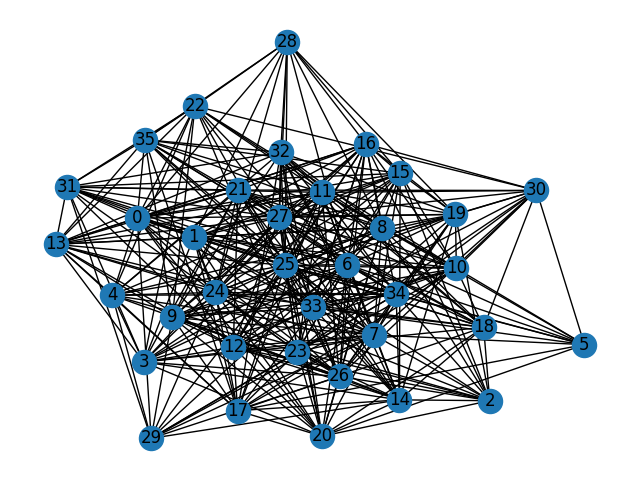

In [6]:
misc.draw(G)

# Common items

In [7]:
# Returns a coloring dictionary from the nodes 'color' attributes
def getColoring() -> dict:
    coloring: dict = {}
    for node in Gstar.nodes():
        coloring[node] = Gstar.nodes[node]['color']
    return coloring

In [8]:
# Print the current situation of the leveled segment data structure
def printLevels():
    print("l: " + str(l))
    print("c: " + str(c))

# Algorithm Specific Methods

In [9]:
def removeEdge(s, t):
    if not G.has_edge(s, t):    # Potentially redundant
        print("Edge not present in graph")
        return
    G.remove_edge(s, t)
    dcOrientDelete(s, t)

def removeVertex(v):

    if not G.has_node(v):   # Potentially redundant
        print("Node not present in graph")
        return
    G.remove_node(v)
    Gstar.remove_node(v)

def addEdge(s, t):

    if G.has_edge(s, t):    # Potentially redundant, but could be extended to also check if the vertices are present yet
        print("Edge already in the graph")
        return
    if (not G.has_node(s) or not G.has_node(t)):
        print("Not all nodes present in graph yet")
        return
    G.add_edge(s, t)
    dcOrientInsert(s,t)

def addVertex(v):
    if G.has_node(v):   # Potentially redundant, depending on the input used during the experiments
        print("Node already present in graph")
        return
    G.add_node(v)
    Gstar.add_node(v)
    Gstar.nodes[v]['color'] = 0
    Gstar.nodes[v]['DINC'] = DincIndex()

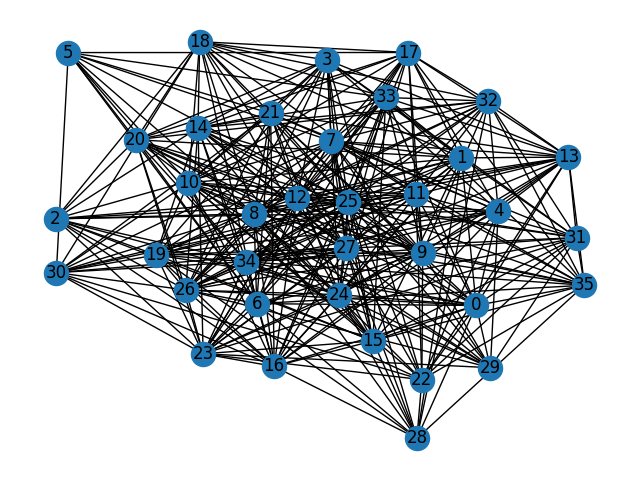

In [10]:
misc.draw(G)

In [11]:
updates = misc.extractUpdates(G, 'random')


In [12]:
Gp = nx.Graph()
Gp.add_nodes_from(G.nodes())
dco = DcOrient.DcOrientAlgo(Gp)
iterator = misc.UpdateIterator(dco, updates)

In [13]:
dco.Gstar.nodes[15]['DINC'].cu

set()

I.cnt is {0: 1}
decreasing color 0
I.cnt is {}
I.cu is {0}
I.cnt is {}
I.cnt is {}
I.cu is {0}
executing CAN step for node 25
cu is {0}
cnt is {}
letting 16 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 16 now has cnt {0: 1}
letting 13 know about color update
I.cnt is {1: 3}
decreasing color 1
I.cnt is {1: 2}
I.cu is set()
Node 13 now has cnt {1: 2, 0: 1}
executing CAN step for node 13
cu is set()
cnt is {1: 2, 0: 1}
executing CAN step for node 16
cu is set()
cnt is {0: 1}
17 cnt is {}
2


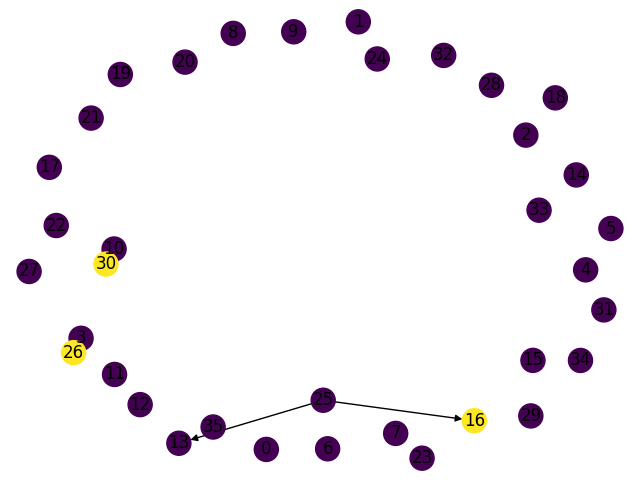

False


In [26]:
c1 = dco.getColoring()

iterator.runUpdate(1)
print("17 cnt is " + str(dco.Gstar.nodes[17]['DINC'].cnt))
c2 = dco.getColoring()
print(misc.numberOfRecolors(c1, c2))
misc.draw(dco.Gstar, dco.getColoring())
print(misc.verifyColoring(dco.G, dco.getColoring()))


In [15]:
dco.getColoring()

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0}

In [16]:
misc.verifyColoring(dco.G, dco.getColoring())

True

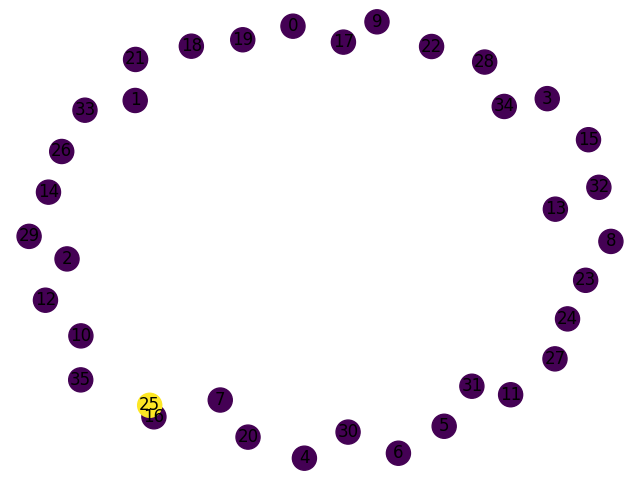

In [17]:
misc.draw(dco.G, dco.getColoring())

In [18]:
misc.numberOfColors(dco.getColoring())

2

In [19]:
Ge = nx.Graph()
Ge.add_nodes_from(G.nodes())
edges = list(G.edges())

In [20]:
misc.extractUpdates(G, 'skewed')

[(15, 31),
 (9, 17),
 (0, 31),
 (15, 28),
 (10, 18),
 (13, 16),
 (14, 15),
 (31, 34),
 (27, 34),
 (6, 9),
 (2, 24),
 (6, 34),
 (23, 27),
 (19, 34),
 (23, 31),
 (25, 34),
 (4, 34),
 (16, 24),
 (7, 29),
 (16, 34),
 (2, 26),
 (16, 19),
 (7, 26),
 (20, 34),
 (0, 20),
 (0, 34),
 (26, 34),
 (27, 35),
 (10, 15),
 (6, 17),
 (8, 32),
 (23, 25),
 (8, 26),
 (6, 31),
 (18, 27),
 (7, 30),
 (8, 20),
 (9, 21),
 (17, 25),
 (6, 20),
 (6, 25),
 (1, 26),
 (8, 15),
 (4, 24),
 (7, 27),
 (24, 25),
 (2, 25),
 (7, 25),
 (21, 26),
 (27, 28),
 (1, 7),
 (26, 33),
 (9, 29),
 (14, 27),
 (25, 32),
 (11, 12),
 (17, 20),
 (8, 19),
 (16, 25),
 (2, 16),
 (11, 26),
 (12, 15),
 (1, 24),
 (26, 30),
 (11, 35),
 (0, 28),
 (30, 34),
 (20, 24),
 (25, 27),
 (14, 34),
 (3, 24),
 (8, 35),
 (0, 24),
 (26, 29),
 (23, 26),
 (6, 14),
 (25, 26),
 (13, 27),
 (3, 12),
 (25, 35),
 (16, 30),
 (24, 34),
 (12, 33),
 (22, 27),
 (0, 16),
 (25, 28),
 (3, 10),
 (1, 16),
 (12, 25),
 (7, 12),
 (8, 16),
 (24, 29),
 (16, 26),
 (18, 24),
 (27, 30),

In [21]:
wu2 = RandomWarmUp2.WarmUp2Algo(Ge, misc.getMaxDegree(G))

updi = misc.UpdateIterator(wu2, edges)

True


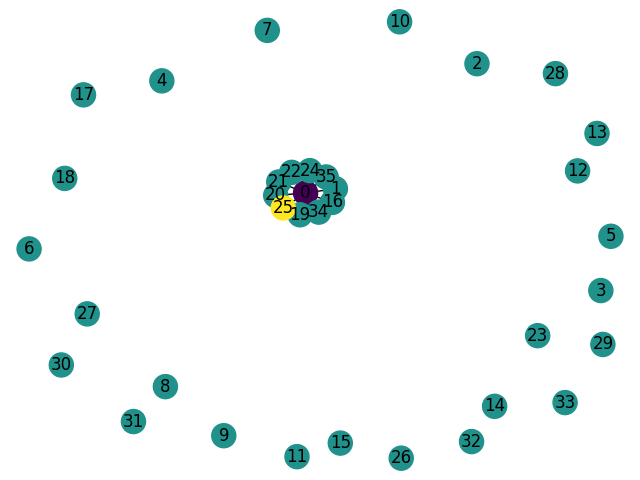

In [22]:
updi.runUpdate(10)
print(misc.verifyColoring(wu2.G, wu2.getColoring()))
misc.draw(wu2.G, wu2.getColoring())

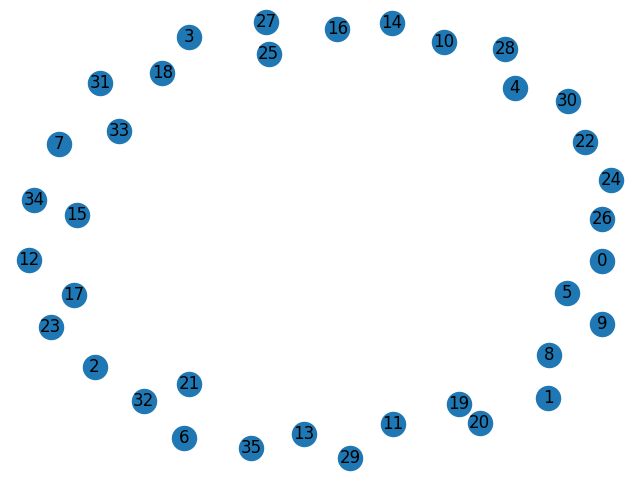

In [23]:
misc.draw(Ge)